In [36]:
import networkx as nx
from cdt.causality.graph import GES, PC, GIES
from cdt.data import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from IPython.display import Image


In [23]:
df = pd.read_parquet('../data/df_final_label.parquet').sort_values(by=['data'])
df = df[df.data > '2019-01-01']

themes = ["tema1","tema2"]
# keyw = [feature for feature in df.columns if feature.startswith('keyw_')]
acoes = [feature for feature in df.columns if feature.startswith('acoes_')]
at_twitter = [feature for feature in df.columns if feature.startswith('atividade_twitter')]
autorias = [feature for feature in df.columns if feature.startswith('aut_')]
disc = [feature for feature in df.columns if feature.startswith('dis_')]
peso = [feature for feature in df.columns if feature.startswith('peso_')]
doacoes = [feature for feature in df.columns if feature.startswith('doacoes_')]
partido = ['partido']
features =  themes + acoes + at_twitter + autorias + disc + peso + doacoes + partido

target = ['voto']

#df = df[features].dropna()#.drop(columns=['keyw_None'])

In [24]:
features = ['partido', 'tema2', 'tema1', 'dis_num_seguiu', 'doacoes_donation_value', 'keyw_alteracao', 'dis_votos_validos', 'keyw_criacao']

In [25]:
categorical_features=["tema1","tema2","partido","doacoes_main_donation"]
encoder = LabelEncoder()
original = df[categorical_features]
mask = df[categorical_features].isnull()
df[categorical_features] = df[categorical_features].fillna('NaN')
df[categorical_features] = df[categorical_features].apply(encoder.fit_transform)
df[categorical_features].where(~mask, original)
df[categorical_features].astype('category')
df

,id_votacao,id_parlamentar,id_parlamentar_parlametria,partido,voto,casa_x,id_proposicao,data,obj_votacao,casa_y,...,dis_disciplina,peso_investimento_partidario,peso_numero_de_mandatos,peso_indice_comissoes,peso_indice_liderancas,peso_indice_cargo_mesa,peso_indice_peso_politico,doacoes_id_parlamentar,doacoes_main_donation,doacoes_donation_value
224037,2179189-45,204571,1204571,9,1,camara,2179189.0,2019-02-12 16:26:57,0,camara,...,0.000000,0.000000,1.0,0.022727,0.000,0.0,0.037879,204571.0,5,22500.000000
70819,2179189-45,204517,1204517,12,1,camara,2179189.0,2019-02-12 16:26:57,0,camara,...,0.000000,0.000000,1.0,0.045455,0.000,0.0,0.042424,204517.0,5,13250.000000
224614,2179189-45,74273,174273,21,1,camara,2179189.0,2019-02-12 16:26:57,0,camara,...,0.000000,0.159804,5.0,0.022727,0.000,0.0,0.203173,74273.0,4,4410.000000
156266,2179189-45,204352,1204352,21,0,camara,2179189.0,2019-02-12 16:26:57,0,camara,...,0.000000,0.664452,4.0,0.386364,0.250,0.0,0.393496,204352.0,7,3000.000000
156857,2179189-45,204531,1204531,14,1,camara,2179189.0,2019-02-12 16:26:57,0,camara,...,0.000000,0.092610,1.0,0.204545,0.250,0.0,0.142765,204531.0,5,8333.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148877,2272137-269,178835,1178835,9,0,camara,2272137.0,2021-03-12 00:01:37,"Votação do DTQ 8: PT: Destaque, com vistas à r...",camara,...,1.000000,0.322327,3.0,0.022727,0.250,0.0,0.219011,178835.0,7,270187.500000
69095,2272137-269,198197,1198197,0,1,camara,2272137.0,2021-03-12 00:01:37,"Votação do DTQ 8: PT: Destaque, com vistas à r...",camara,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN
248742,2272137-269,141553,1141553,24,1,camara,2272137.0,2021-03-12 00:01:37,"Votação do DTQ 8: PT: Destaque, com vistas à r...",camara,...,0.523810,0.080061,6.0,0.022727,0.000,0.0,0.220558,141553.0,6,129694.444444
86439,2272137-269,160531,1160531,32,1,camara,2272137.0,2021-03-12 00:01:37,"Votação do DTQ 8: PT: Destaque, com vistas à r...",camara,...,1.000000,0.629602,3.0,0.022727,0.375,0.0,0.305466,NaN,21,NaN


In [59]:
df.doacoes_donation_value = df.doacoes_donation_value.fillna(0)
df.doacoes_donation_value = df.doacoes_donation_value - df.doacoes_donation_value.mean()
df.doacoes_donation_value = df.doacoes_donation_value / df.doacoes_donation_value.std()
df[features+['voto']]

,partido,tema2,tema1,dis_num_seguiu,doacoes_donation_value,keyw_alteracao,dis_votos_validos,keyw_criacao,voto
224037,9,19,7,0.0,-0.220608,0.0,0.0,0.0,1
70819,12,19,7,0.0,-0.274417,0.0,0.0,0.0,1
224614,21,19,7,0.0,-0.325841,0.0,0.0,0.0,1
156266,21,19,7,0.0,-0.334043,0.0,0.0,0.0,0
156857,14,19,7,0.0,-0.303018,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...
148877,9,0,0,19.0,1.220235,0.0,19.0,0.0,0
69095,0,0,0,21.0,-0.351495,0.0,21.0,0.0,1
248742,24,0,0,11.0,0.402962,0.0,21.0,0.0,1
86439,32,0,0,21.0,-0.351495,0.0,21.0,0.0,1


In [60]:
df[features+['voto']].to_csv('df_ensamble.csv', index=False)

In [30]:
grafo_inicial = nx.DiGraph()
grafo_inicial.add_node('voto')
for feature in features:
    grafo_inicial.add_node(feature)
    grafo_inicial.add_edge(feature, 'voto')

In [31]:
obj = GES()

output = obj.predict(df[features+target], graph=grafo_inicial)

GES is ran on the skeleton of the given graph.


In [32]:
# output = obj.predict(df)

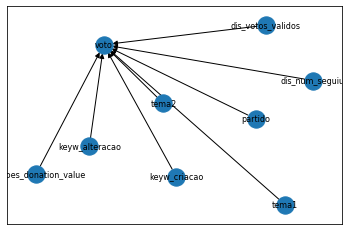

In [35]:
nx.draw_networkx(grafo_inicial, font_size=8)
plt.show()

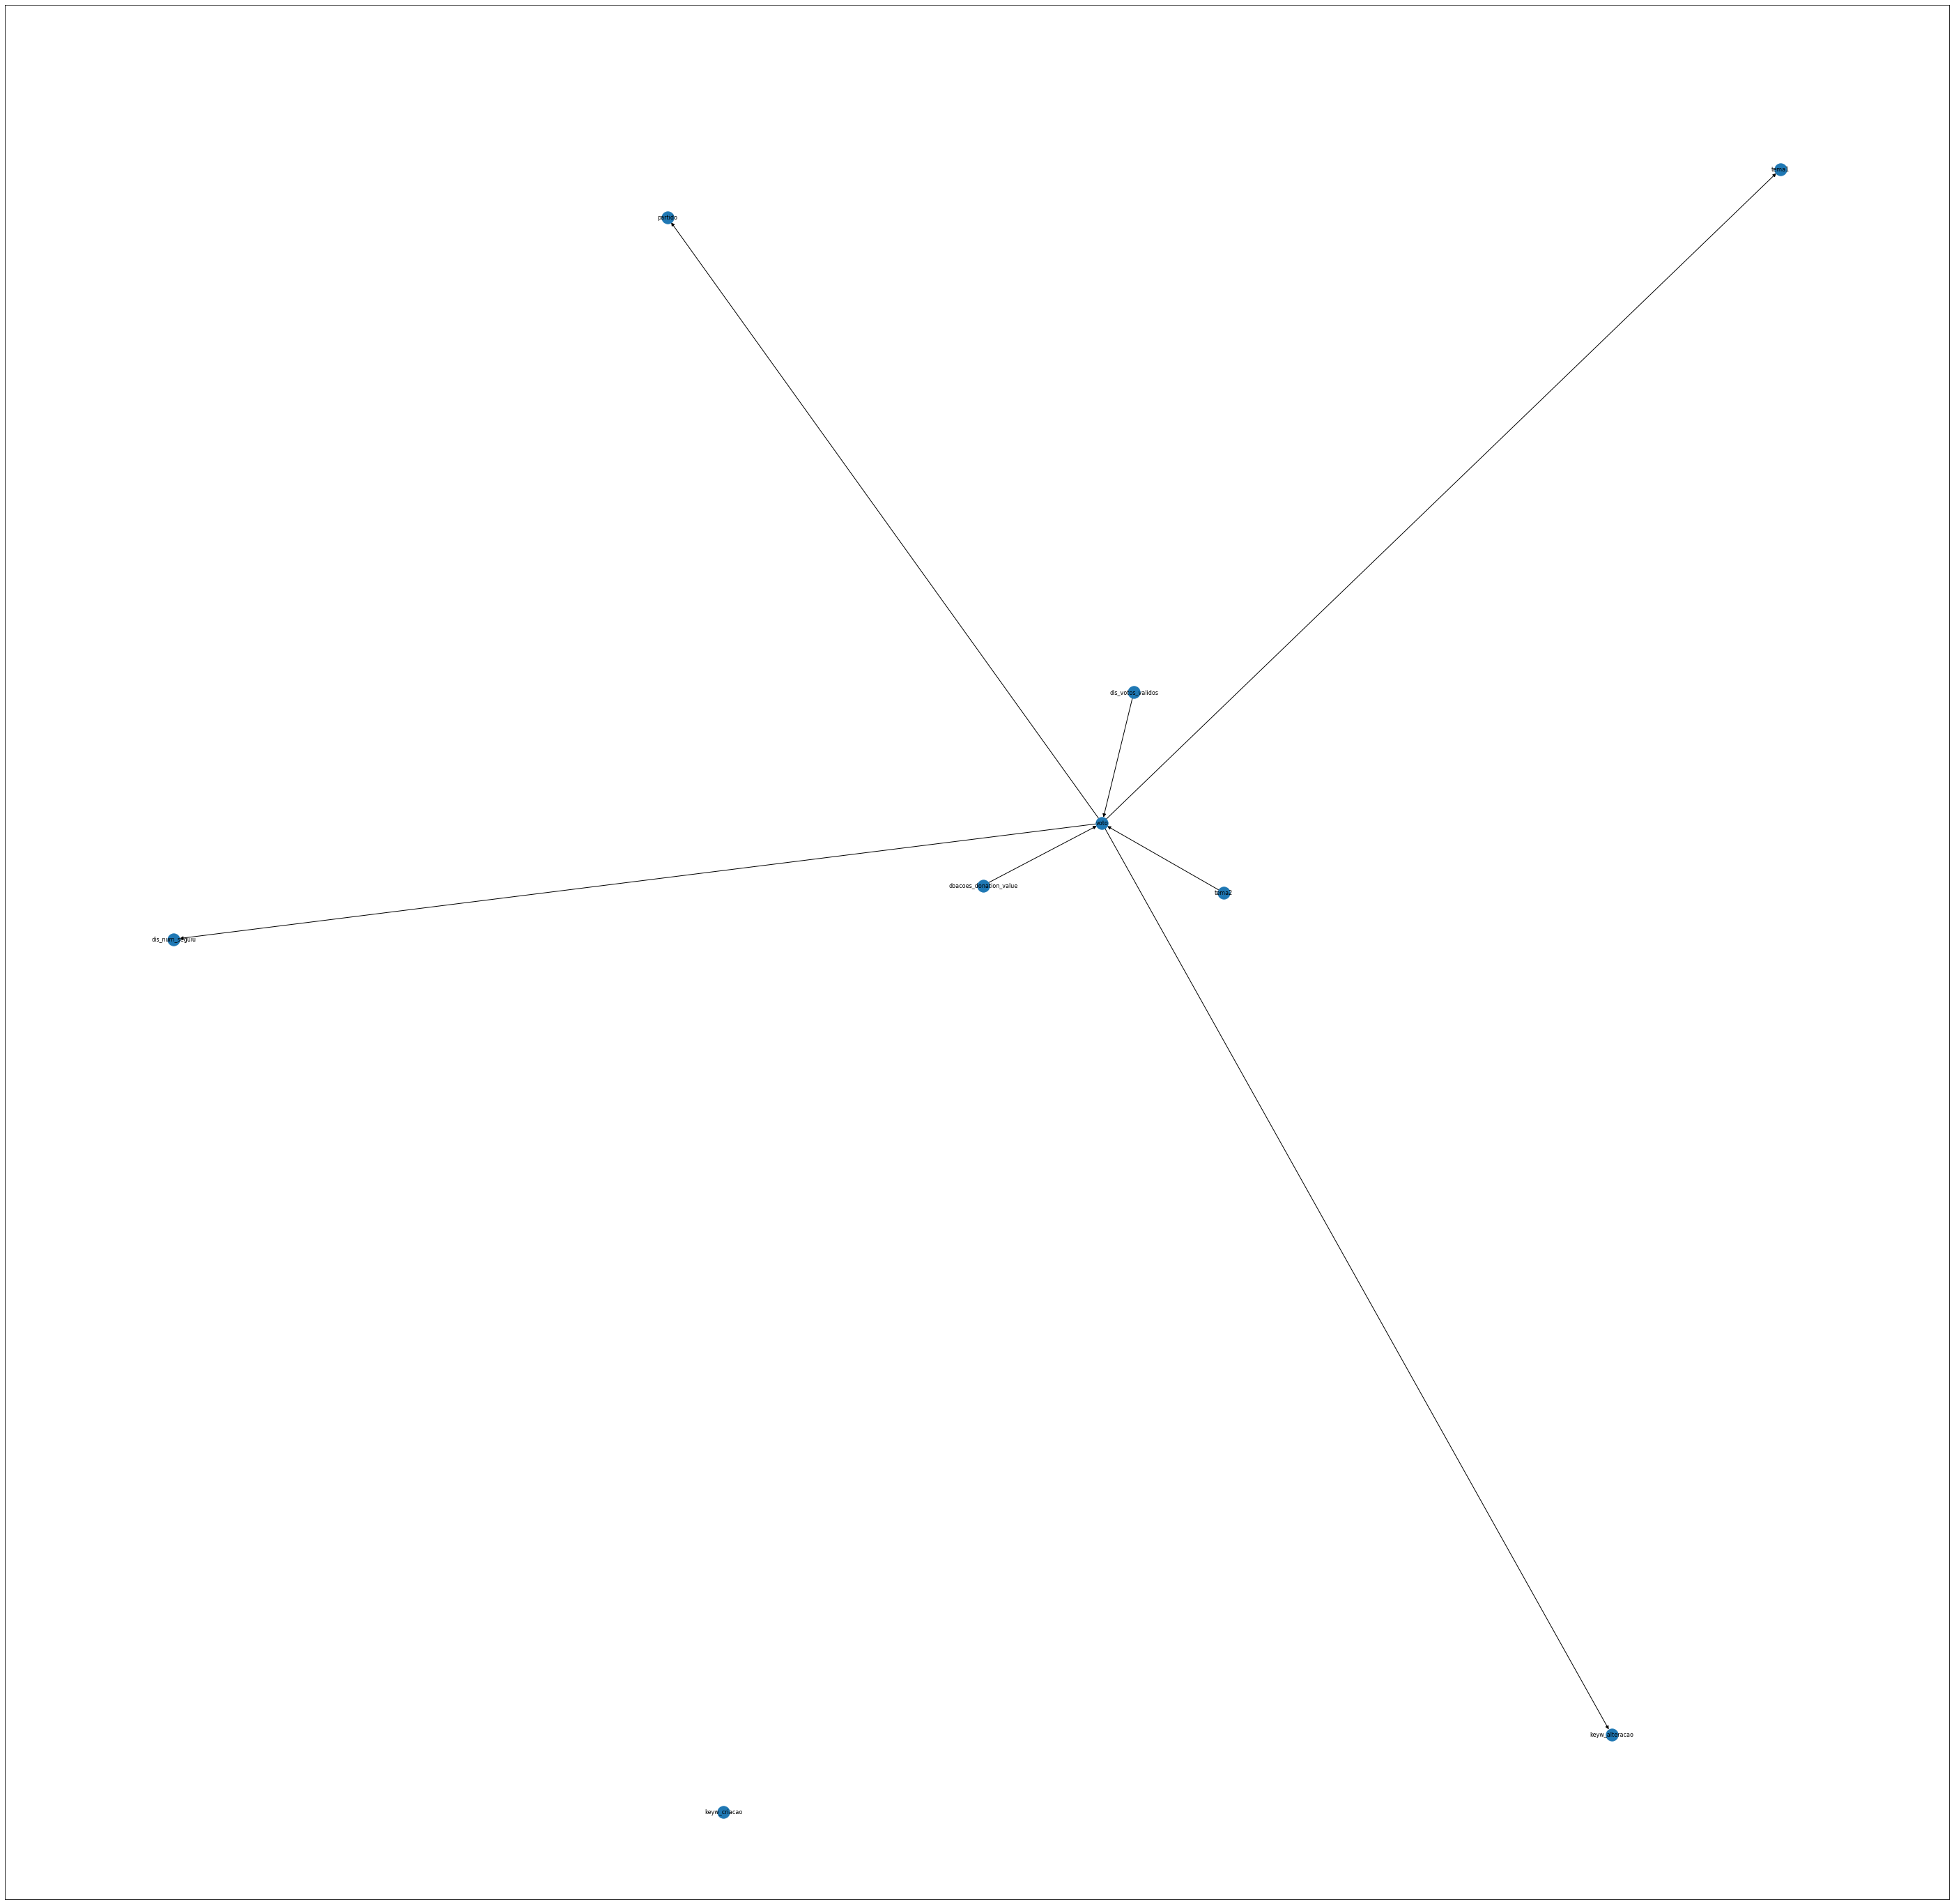

In [34]:
plt.figure(3,figsize=(50,50)) 
nx.draw_networkx(output, font_size=8)
plt.show()

In [61]:
input = df[features+['voto']].fillna(0)


input['doacoes_donation_value'] = (input['doacoes_donation_value'] - input['doacoes_donation_value'].mean()) / input['doacoes_donation_value'].std()

In [62]:
sm = from_pandas(
    input,
    tabu_parent_nodes=["voto"],
    tabu_child_nodes=["partido"],
)
sm.remove_edges_below_threshold(0.5)

In [69]:
sm.add_edge("partido", "voto")
sm.add_edge("tema1", "voto")
sm.add_edge("tema2", "voto")
sm.add_edge("dis_num_seguiu", "voto")
sm.add_edge("tema1", "dis_num_seguiu")

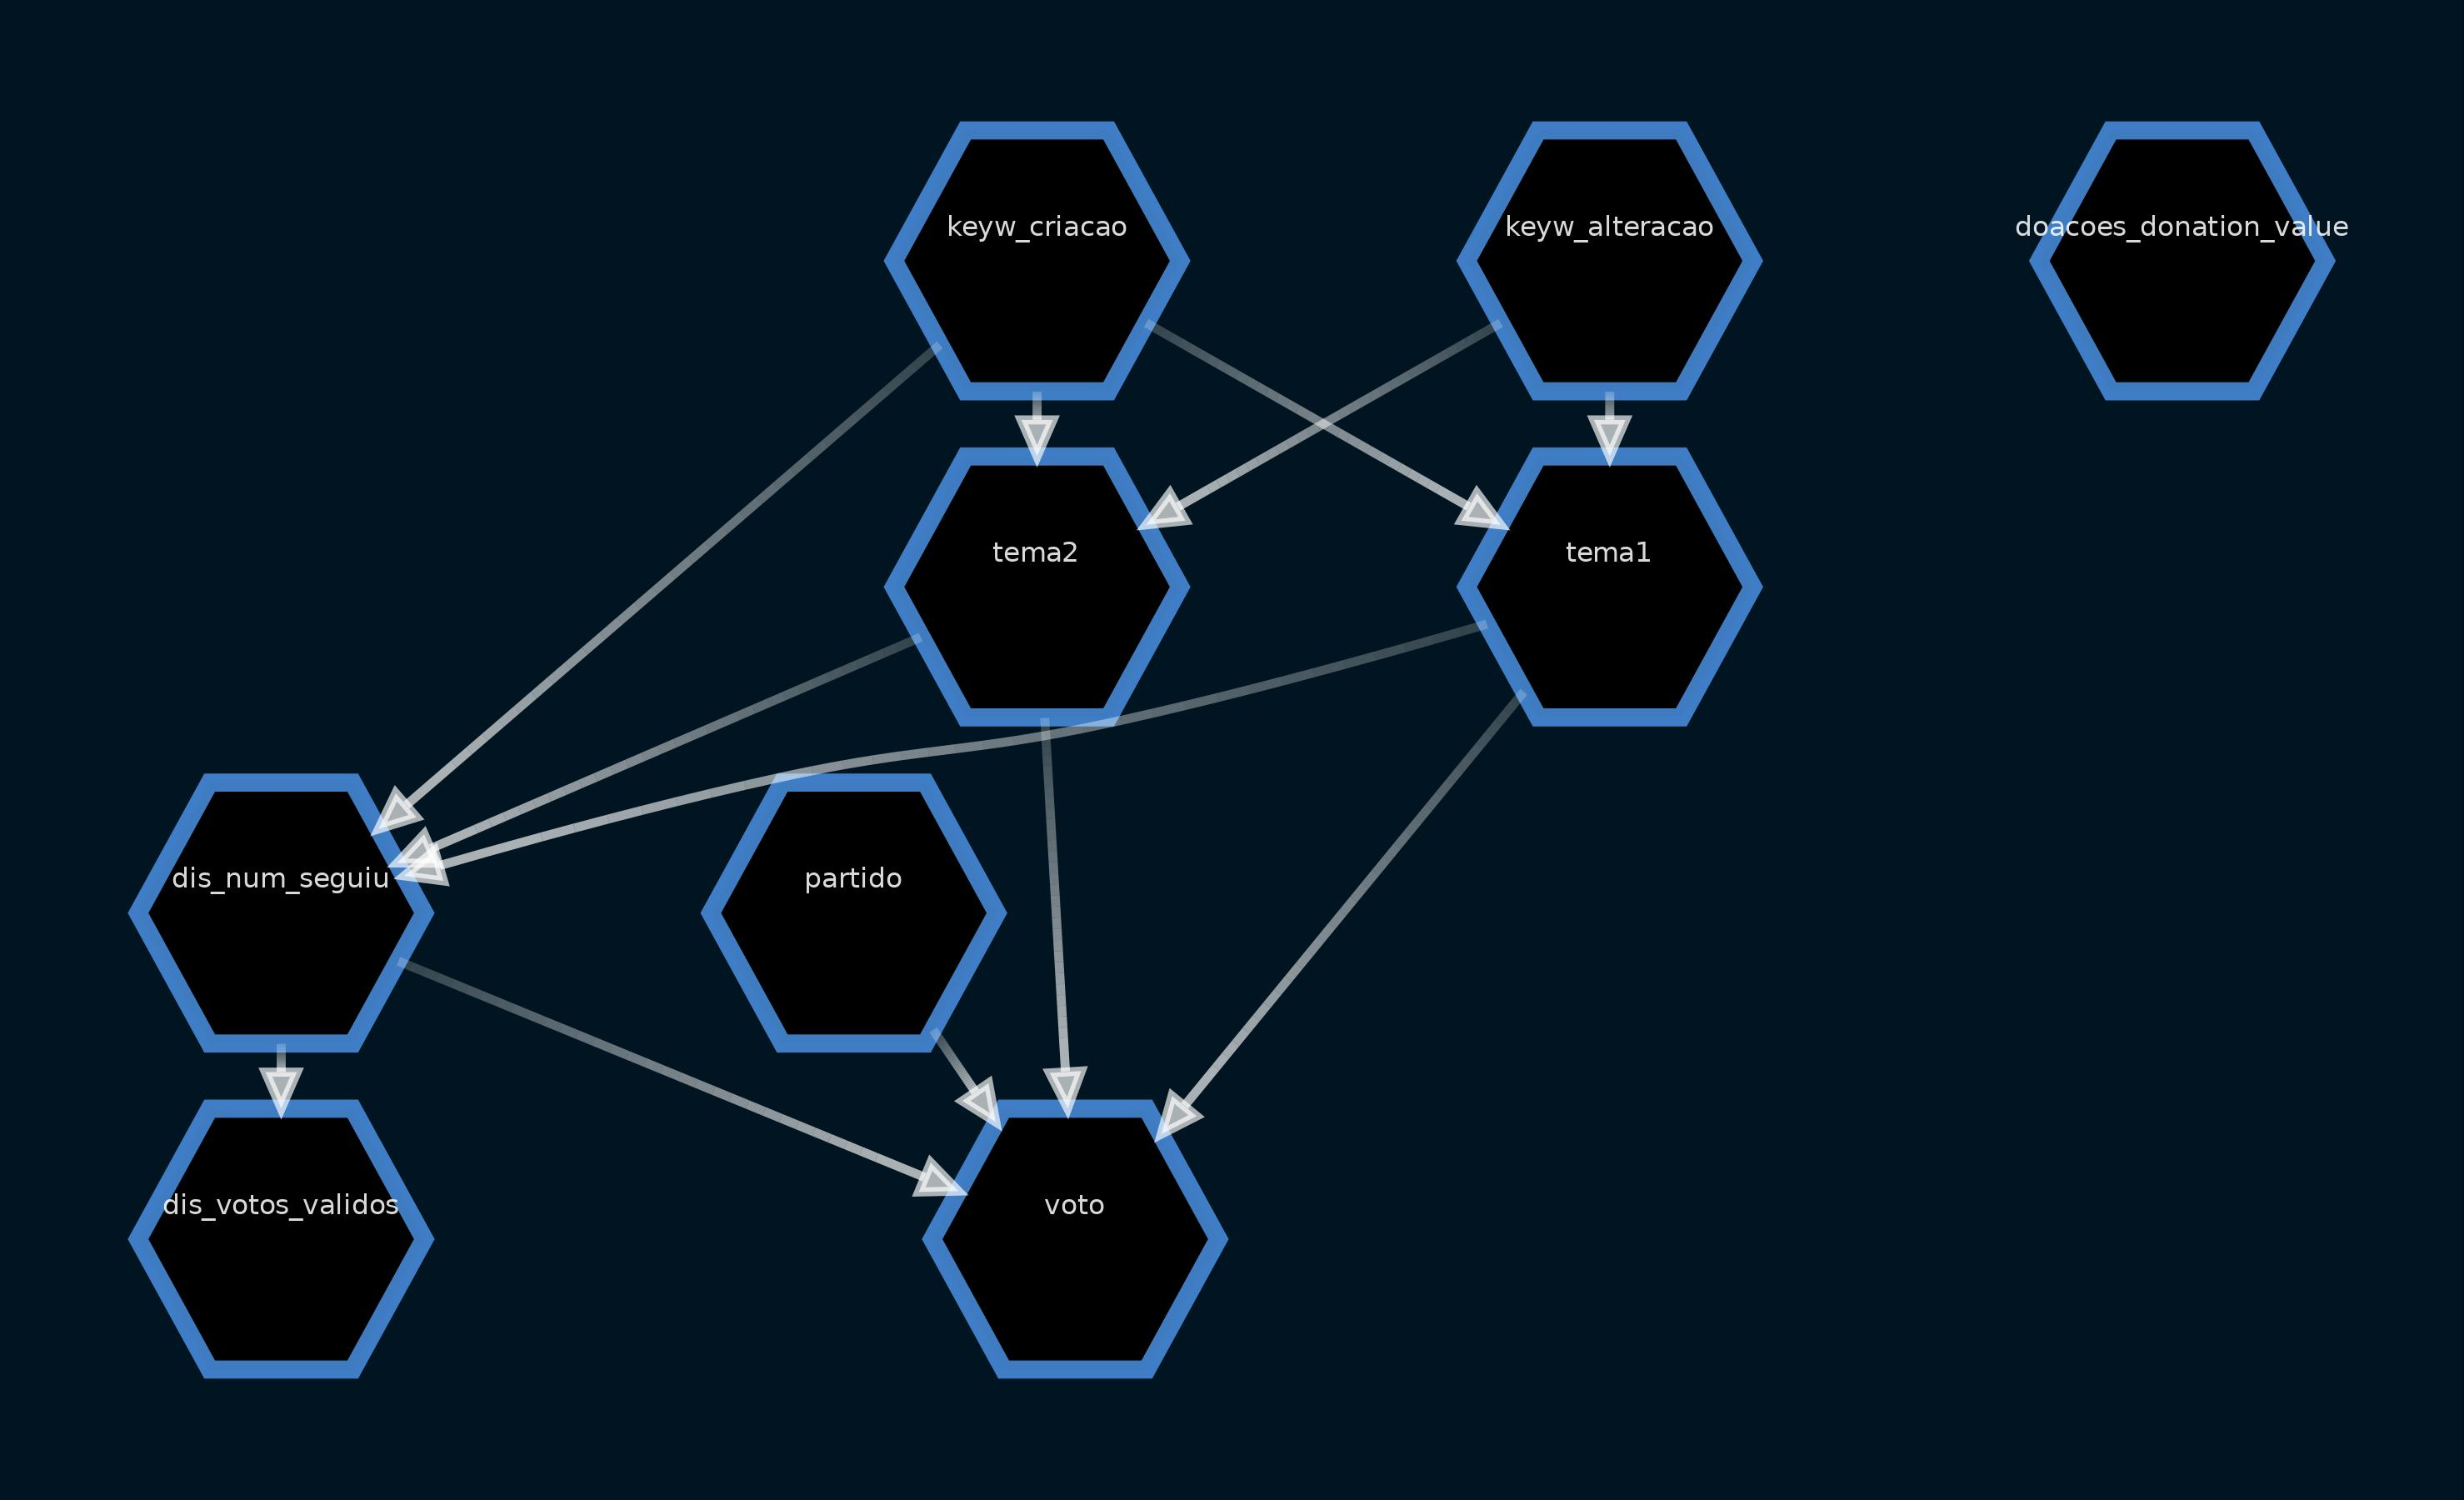

In [70]:
graph_attributes = {
    "splines": "spline",  # I use splies so that we have no overlap
    "ordering": "out",
    "ratio": "fill",  # This is necessary to control the size of the image
    "size": "16,9!",  # Set the size of the final image. (this is a typical presentation size)
    "fontcolor": "#FFFFFFD9",
    "fontname": "Helvetica",
    "fontsize": 15,
    "labeljust": "l",
    "labelloc": "t",
    "pad": "1,1",
    "dpi": 200,
    "nodesep": 0.8,
    "ranksep": ".5 equally",
}

node_attributes = {
    node: {
        "shape": "hexagon",
        "width": 2.2,
        "height": 2,
        "fillcolor": "#000000",
        "penwidth": "10",
        "color": "#4a90e2d9",
        "fontsize": 15,
        "labelloc": "c",
        }
        for node in sm.nodes
}

edge_attributes = {
    (u, v): {
        "penwidth": 5 ,  # Setting edge thickness
        # "weight": 5 + w/10,  # Higher "weight"s mean shorter edges
        "arrowsize": 2,  # Avoid too large arrows
        "arrowtail": "dot",
    }
    for u, v, w in sm.edges(data="weight")
}

viz = plot_structure(
    sm,
    prog="dot",
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes
)
display(Image(viz.draw(format='jpg')))

In [68]:
df.dis_num_seguiu

224037     0.0
70819      0.0
224614     0.0
156266     0.0
156857     0.0
          ... 
148877    19.0
69095     21.0
248742    11.0
86439     21.0
225597     7.0
Name: dis_num_seguiu, Length: 303505, dtype: float64